# CORAG: Optimizing Chunk Selection in Retrieval-Augmented Generation




CORAG (Chunk Optimization for Retrieval-Augmented Generation) enhances RAG systems by optimizing the selection of relevant chunks from databases. This framework addresses three significant challenges: efficiently correlating chunks, managing non-monotonic utility where adding chunks may reduce overall utility, and adapting to diverse query types. By employing Monte Carlo Tree Search (MCTS), CORAG seeks optimal combinations of chunks while considering cost constraints, achieving up to a 30% improvement over baseline models.



## Key Features of CORAG



- **Efficient Chunk Correlation**: CORAG focuses on effectively correlating chunks to ensure that the most relevant information is retrieved for any given query.

- **Handling Non-Monotonic Utility**: The framework is designed to manage situations where adding more chunks may not necessarily improve utility, thus optimizing the selection process.

- **Adaptability to Query Types**: CORAG can adapt its chunk selection strategy based on the type of query, ensuring that it remains effective across various contexts.

- **Monte Carlo Tree Search (MCTS)**: Utilizes MCTS to explore potential chunk combinations and identify the most beneficial selections while factoring in associated costs.


## How CORAG Works



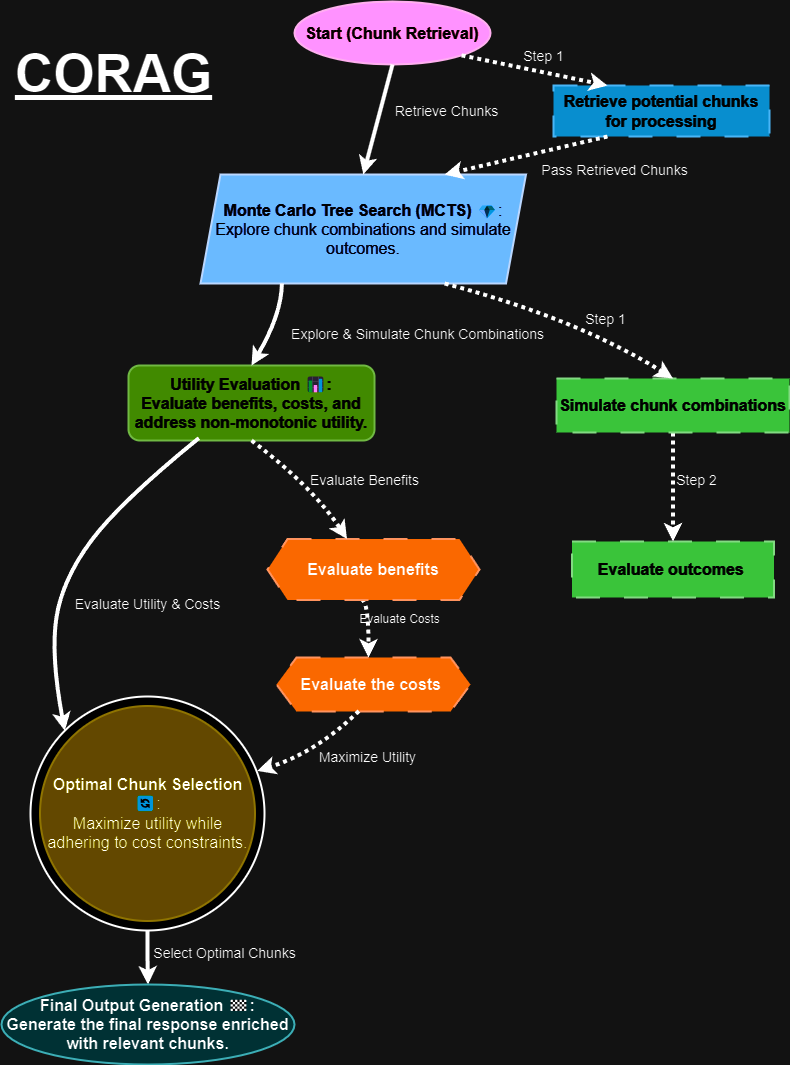

1. **Chunk Retrieval**:
   - When a query is received, CORAG retrieves potential chunks from a pre-defined database.
   - These chunks are assessed for relevance based on their correlation with the query.

2. **Monte Carlo Tree Search Application**:
   - MCTS is employed to explore various combinations of retrieved chunks.
   - The algorithm simulates outcomes based on different chunk selections, evaluating their utility and cost-effectiveness.

3. **Utility Evaluation**:
   - Each combination is evaluated for its utility, taking into account both the benefits and costs associated with including additional chunks.
   - Non-monotonic utility scenarios are specifically addressed to ensure optimal selections are made.

4. **Optimal Chunk Selection**:
   - Based on the results from MCTS simulations, CORAG identifies the optimal combination of chunks that maximizes utility while adhering to cost constraints.
   - This selected combination is then used in generating responses or outputs for the original query.

5. **Final Output Generation**:
   - The selected chunks are integrated into the response generation process, ensuring that outputs are enriched with relevant information while maintaining accuracy and coherence.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import random

In [ ]:
# Step 0: Initialize the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and process the PDF document
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper on Masked Language Models
pdf_path = "BERT_paper_CORAG.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Query Processing
query = "Unsupervised Feature-based Approaches"

In [ ]:
vectorizer = TfidfVectorizer()
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Chunk the document
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

In [ ]:
# Step 3: Chunk Retrieval
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k = 10  # Retrieve the top 10 most relevant chunks

In [ ]:
retrieved_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in retrieved_chunk_indices]
print(f"Retrieved {len(retrieved_chunks)} relevant chunks for the query: {query}")

Retrieved 10 relevant chunks for the query: Unsupervised Feature-based Approaches


In [ ]:
# Step 4: Monte Carlo Tree Search Application
def mcts_simulation(chunks, iterations=100):
    # Randomly simulate chunk combinations and evaluate them
    best_combination = None
    best_score = -float('inf')

    for _ in range(iterations):
        sampled_chunks = random.sample(chunks, k=random.randint(1, len(chunks)))
        score = evaluate_combination(sampled_chunks)
        if score > best_score:
            best_score = score
            best_combination = sampled_chunks
    return best_combination

In [ ]:
def evaluate_combination(chunk_list):
    # A mock utility evaluation function for demonstration purposes
    return sum(len(chunk) for chunk in chunk_list) / len(chunk_list)

In [ ]:
optimal_chunks = mcts_simulation(retrieved_chunks, iterations=50)

In [ ]:
# Step 5: Final Output Generation
final_responses = []
for chunk in optimal_chunks:
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a utility-optimized assistant."},
                {"role": "user", "content": f"Given the query: '{query}' and passage: '{chunk}', generate an accurate response."},
            ],
            model="llama3-8b-8192",
        )
        final_responses.append(response.choices[0].message.content)
    except Exception as e:
        print(f"Error generating response for a chunk: {e}")

In [ ]:
# Step 6: Output the final response
print("\n--- Final Output ---\n")
print({
    "query": query,
    "optimal_chunks": optimal_chunks,
    "responses": final_responses
})


--- Final Output ---

{'query': 'Unsupervised Feature-based Approaches', 'optimal_chunks': ['can beneﬁt from the larger, more\nexpressive pre-trained representations even when\ndownstream task data is very small.\n5.3 Feature-based Approach with BERT\nAll of the BERT results presented so far have used\nthe ﬁne-tuning approach, where a simple classiﬁ-\ncation layer is added to the pre-trained model, and\nall parameters are jointly ﬁne-tuned on a down-\nstream task. However, the feature-based approach,\nwhere ﬁxed features are extracted from the pre-\ntrained model, has certain advantages. First, not\nall tasks can be easily represented by a Trans-\nformer encoder architecture, and therefore require\na task-speciﬁc model architecture to be added.\nSecond, there are major computational beneﬁts\nto pre-compute an expensive representation of the\ntraining data once and then run many experiments\nwith cheaper models on top of this representation.\nIn this section, we compare the two approac

1. **Initialization**  
   - **Purpose**: Set up the system to interact with the Groq API for advanced query processing and response generation.  
   - **Key Functionality**: Establishes the environment for subsequent operations, ensuring smooth communication with the model.

2. **Downloading and Processing the PDF**  
   - **Purpose**: Converts the source document (PDF) into text format for easy processing.  
   - **Key Functionality**:  
     - Downloads the specified document.  
     - Extracts and aggregates the text content into a usable dataset for further steps.

3. **Query Processing**  
   - **Purpose**: Prepares the user query and document for efficient matching.  
   - **Key Functionality**:  
     - Splits the document into smaller, manageable chunks.  
     - Encodes both the chunks and the query using TF-IDF to calculate relevance during retrieval.

4. **Chunk Retrieval**  
   - **Purpose**: Identifies the most relevant parts of the document related to the user query.  
   - **Key Functionality**:  
     - Compares the encoded query against the document chunks using similarity measures.  
     - Selects the top matching chunks that best align with the query's context.

5. **Monte Carlo Tree Search (MCTS) Application**  
   - **Purpose**: Optimizes the selection of chunks by simulating multiple retrieval scenarios.  
   - **Key Functionality**:  
     - Explores different chunk combinations to balance utility (relevance and informativeness) and cost (retrieval and processing efficiency).  
     - Addresses non-linear utility challenges to find the best combination of chunks.

6. **Utility Evaluation**  
   - **Purpose**: Ensures that the selected chunks provide maximum value for the query.  
   - **Key Functionality**:  
     - Measures the trade-off between the relevance of the information and the computational resources required.  
     - Evaluates how including or excluding certain chunks impacts the overall response quality.

7. **Optimal Chunk Selection**  
   - **Purpose**: Finalizes the best subset of chunks to use in the response generation.  
   - **Key Functionality**:  
     - Utilizes the outcomes of the MCTS simulations to pick chunks that maximize usefulness while minimizing redundancy or cost.

8. **Final Output Generation**  
   - **Purpose**: Integrates the selected chunks into a coherent and relevant response for the query.  
   - **Key Functionality**:  
     - Combines the selected information into a meaningful, accurate, and logically structured output.  
     - Ensures that the response is both contextually rich and aligned with the user’s original query.

## Applications of CORAG



- **Open-Domain Question Answering**: Enhances systems that require accurate answers by optimizing chunk retrieval strategies tailored to user queries.

- **Content Generation Systems**: Assists writers by providing contextually relevant information through optimized retrieval processes that enhance narrative quality.

- **Knowledge Management Systems**: Improves access to information while ensuring accuracy in responses based on comprehensive data retrieval techniques.

- **Educational Tools**: Supports learning applications by providing tailored responses that leverage optimized chunk selections for enhanced learning experiences.




## Advantages of CORAG



- **Improved Retrieval Performance**: By optimizing chunk selection, CORAG enhances the overall performance of RAG systems, leading to more accurate and relevant outputs.

- **Cost-Effective Solutions**: The incorporation of cost constraints in the optimization process ensures that resources are utilized efficiently, minimizing unnecessary expenses.

- **Flexibility Across Tasks**: The ability to adapt to different query types allows CORAG to be effective in a wide range of applications, from question answering to content generation.

- **Significant Performance Gains**: Achieving up to a 30% improvement over baseline models demonstrates the effectiveness of CORAG in enhancing retrieval-augmented generation capabilities.



## Limitations of CORAG



- **Complexity in Implementation**: Integrating MCTS with RAG systems may introduce complexity, requiring careful design and management of the optimization process.

- **Dependence on Quality Data**: The effectiveness of chunk selection relies heavily on the quality and relevance of the data stored in the database; poor-quality data can lead to suboptimal outcomes.

- **Resource Intensive**: The MCTS process can be computationally demanding, particularly when exploring large datasets or numerous chunk combinations.



## Conclusion



CORAG represents a significant advancement in retrieval-augmented generation methodologies by optimizing chunk selection through Monte Carlo Tree Search. By addressing key challenges related to chunk correlation and non-monotonic utility, it enhances retrieval performance and adaptability across diverse tasks. As AI continues to evolve, frameworks like CORAG will play an essential role in improving how language models integrate external knowledge, ultimately leading to more reliable and effective applications.



Having explored CORAG, we will now move on to EACO RAG.